## Part 1
### Dataset management

In [ ]:
medical_ner = pd.read_csv('Clinical-Trial-Parser/data/ner/medical_ner.tsv', delimiter='\t',header=None,
                          names=['patient_id','disease','description'])
medical_ner.head()

,patient_id,disease,description
0,NCT03188185,28:35:chronic_disease,Has a significant risk for suicide
1,NCT03188185,46:49:chronic_disease,Has any current primary diagnosis other than M...
2,NCT03188185,"50:62:chronic_disease,64:75:chronic_disease,80...",Has any other significant medical condition (e...
3,NCT03188185,"14:49:treatment,61:73:upper_bound,96:99:treatm...",Has received electroconvulsive therapy treatme...
4,NCT03188185,"10:25:treatment,31:38:treatment,40:49:treatmen...","Has used opioid agonists (eg, codeine, oxycodo..."


#### (a) Simplify the task: Create a simpler task with four entity types

In [ ]:
treatment=[]
chronic=[]
cancer=[]
allergy=[]

for i in range(0,len(medical_ner)):
  diss = medical_ner.iloc[i]['disease'].split(':')
  flag_treat = flag_chronic = flag_cancer = flag_allergy = 0
  for dis in diss:
    if 'treatment' in dis.split(','):
      flag_treat = 1
    if 'chronic_disease' in dis.split(','):
      flag_chronic = 1
    if 'cancer' in dis.split(','):
      flag_cancer = 1
    if 'allergy_name' in dis.split(','):
      flag_allergy = 1
  if(flag_treat):
    treatment.append(i)
  if(flag_chronic):
    chronic.append(i)
  if(flag_cancer):
    cancer.append(i)
  if(flag_allergy):
    allergy.append(i)


In [ ]:
disease_set = set()
disease_set = disease_set.union(set(treatment),set(chronic),set(cancer),set(allergy))
all = set(i for i in range(0,len(medical_ner)))
oth = all-disease_set

other = list(oth)

#### (b) saving files in json format

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
treatment_df = pd.DataFrame(columns=['patient_id','disease','description'])
chronic_df = pd.DataFrame(columns=['patient_id','disease','description'])
cancer_df = pd.DataFrame(columns=['patient_id','disease','description'])
allergy_df = pd.DataFrame(columns=['patient_id','disease','description'])
other_df = pd.DataFrame(columns=['patient_id','disease','description'])

for i in treatment:
  treatment_df = treatment_df.append(medical_ner.iloc[i],ignore_index=True)
for i in chronic:
  chronic_df = chronic_df.append(medical_ner.iloc[i],ignore_index=True)
for i in cancer:
  cancer_df = cancer_df.append(medical_ner.iloc[i],ignore_index=True)
for i in allergy:
  allergy_df = allergy_df.append(medical_ner.iloc[i],ignore_index=True)
for i in other:
  other_df = other_df.append(medical_ner.iloc[i],ignore_index=True)

In [ ]:
treatment_df.to_json('treatment_file.json')
chronic_df.to_json('chroni_disease_file.json')
cancer_df.to_json('cancer_file.json')
allergy_df.to_json('allergy_file.to_json')
other_df.to_json('remaining_file.to_json')

In [ ]:
!git clone https://github.com/facebookresearch/Clinical-Trial-Parser

Cloning into 'Clinical-Trial-Parser'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 292 (delta 26), reused 24 (delta 24), pack-reused 243
Receiving objects: 100% (292/292), 74.63 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [ ]:
import pandas as pd

## Task

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive

/content/drive/My Drive/miimansa


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
import warnings
warnings.filterwarnings("ignore")

### Dataset prepration

In [ ]:
T1 = pd.read_csv('G1.csv')
T2 = pd.read_csv('G2.csv')
T3 = pd.read_csv('G3.csv')
#T1.head()

In [ ]:
T1.drop(['Unnamed: 0'],axis=1, inplace=True)
T2.drop(['Unnamed: 0'],axis=1, inplace=True)
T3.drop(['Unnamed: 0'],axis=1, inplace=True)

#### T1-G1

In [ ]:
treatment=[]
chronic=[]
cancer=[]
allergy=[]

for i in range(0,len(T1)):
  diss = T1.iloc[i]['tags'].split(':')
  flag_treat = flag_chronic = flag_cancer = flag_allergy = 0
  for dis in diss:
    if 'treatment' in dis.split(','):
      flag_treat = 1
    if 'chronic_disease' in dis.split(','):
      flag_chronic = 1
    if 'cancer' in dis.split(','):
      flag_cancer = 1
    if 'allergy_name' in dis.split(','):
      flag_allergy = 1
  if(flag_treat):
    treatment.append(i)
  if(flag_chronic):
    chronic.append(i)
  if(flag_cancer):
    cancer.append(i)
  if(flag_allergy):
    allergy.append(i)

In [ ]:
set_treat = set(treatment)
set_chr = set(chronic)
set_can = set(cancer)
set_allr = set(allergy)

print('Treatment and Chronic ',len(set_treat.intersection(set_chr)))
print('Treatment and Cancer', len(set_treat.intersection(set_can)))
print('Treatment and Allergy', len(set_treat.intersection(set_allr)))
print('Chronic and Cancer', len(set_chr.intersection(set_can)))
print('Chronic and Allergy', len(set_chr.intersection(set_allr)))
print('Cancer and Allergy', len(set_can.intersection(set_allr)))
print('Treatment, Chronic and Cancer',len(set_can.intersection(set_treat.intersection(set_chr))))

Treatment and Chronic  491
Treatment and Cancer 343
Treatment and Allergy 12
Chronic and Cancer 106
Chronic and Allergy 8
Cancer and Allergy 3
Treatment, Chronic and Cancer 46


In [ ]:
label = [0]*len(T1)
T1['label'] = label
#0--> treatment || 1-->chronic || 2-->Cancer || 3-->Allergy
for i in set_chr:
  T1.at[i, 'label'] = 1
for i in set_can:
  T1.at[i, 'label'] = 2
for i in set_allr:
  T1.at[i, 'label'] = 3
#T1.head()

#### T2-G2

In [ ]:
treatment=[]
chronic=[]
cancer=[]
allergy=[]

for i in range(0,len(T2)):
  diss = T2.iloc[i]['tags'].split(':')
  flag_treat = flag_chronic = flag_cancer = flag_allergy = 0
  for dis in diss:
    if 'treatment' in dis.split(','):
      flag_treat = 1
    if 'chronic_disease' in dis.split(','):
      flag_chronic = 1
    if 'cancer' in dis.split(','):
      flag_cancer = 1
    if 'allergy_name' in dis.split(','):
      flag_allergy = 1
  if(flag_treat):
    treatment.append(i)
  if(flag_chronic):
    chronic.append(i)
  if(flag_cancer):
    cancer.append(i)
  if(flag_allergy):
    allergy.append(i)

In [ ]:
set_treat = set(treatment)
set_chr = set(chronic)
set_can = set(cancer)
set_allr = set(allergy)

print('Treatment and Chronic ',len(set_treat.intersection(set_chr)))
print('Treatment and Cancer', len(set_treat.intersection(set_can)))
print('Treatment and Allergy', len(set_treat.intersection(set_allr)))
print('Chronic and Cancer', len(set_chr.intersection(set_can)))
print('Chronic and Allergy', len(set_chr.intersection(set_allr)))
print('Cancer and Allergy', len(set_can.intersection(set_allr)))
print('Treatment, Chronic and Cancer',len(set_can.intersection(set_treat.intersection(set_chr))))

Treatment and Chronic  482
Treatment and Cancer 344
Treatment and Allergy 10
Chronic and Cancer 104
Chronic and Allergy 11
Cancer and Allergy 1
Treatment, Chronic and Cancer 45


In [ ]:
label = [0]*len(T2)
T2['label'] = label
#0--> treatment || 1-->chronic || 2-->Cancer || 3-->Allergy
for i in set_chr:
  T2.at[i, 'label'] = 1
for i in set_can:
  T2.at[i, 'label'] = 2
for i in set_allr:
  T2.at[i, 'label'] = 3
#T1.head()

#### T3-G3

In [ ]:
treatment=[]
chronic=[]
cancer=[]
allergy=[]

for i in range(0,len(T3)):
  diss = T3.iloc[i]['tags'].split(':')
  flag_treat = flag_chronic = flag_cancer = flag_allergy = 0
  for dis in diss:
    if 'treatment' in dis.split(','):
      flag_treat = 1
    if 'chronic_disease' in dis.split(','):
      flag_chronic = 1
    if 'cancer' in dis.split(','):
      flag_cancer = 1
    if 'allergy_name' in dis.split(','):
      flag_allergy = 1
  if(flag_treat):
    treatment.append(i)
  if(flag_chronic):
    chronic.append(i)
  if(flag_cancer):
    cancer.append(i)
  if(flag_allergy):
    allergy.append(i)

In [ ]:
set_treat = set(treatment)
set_chr = set(chronic)
set_can = set(cancer)
set_allr = set(allergy)

print('Treatment and Chronic ',len(set_treat.intersection(set_chr)))
print('Treatment and Cancer', len(set_treat.intersection(set_can)))
print('Treatment and Allergy', len(set_treat.intersection(set_allr)))
print('Chronic and Cancer', len(set_chr.intersection(set_can)))
print('Chronic and Allergy', len(set_chr.intersection(set_allr)))
print('Cancer and Allergy', len(set_can.intersection(set_allr)))
print('Treatment, Chronic and Cancer',len(set_can.intersection(set_treat.intersection(set_chr))))

Treatment and Chronic  532
Treatment and Cancer 318
Treatment and Allergy 11
Chronic and Cancer 94
Chronic and Allergy 9
Cancer and Allergy 1
Treatment, Chronic and Cancer 45


In [ ]:
label = [0]*len(T3)
T3['label'] = label
#0--> treatment || 1-->chronic || 2-->Cancer || 3-->Allergy
for i in set_chr:
  T3.at[i, 'label'] = 1
for i in set_can:
  T3.at[i, 'label'] = 2
for i in set_allr:
  T3.at[i, 'label'] = 3
#T1.head()

### Text Processing

In [ ]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf

#from nltk.tokenize import TweetTokenizer #no great use, helpful for pre-processing
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
# Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding, Conv2D
#from tensorflow.keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

import nltk
from numpy.ma.core import sqrt
from sklearn.utils import shuffle

In [ ]:
#Splitting the files to train-test
X_trainT1, X_testT1, y_trainT1, y_testT1 = train_test_split(T1['text'], T1['label'], test_size=0.2, random_state=42)
X_trainT2, X_testT2, y_trainT2, y_testT2 = train_test_split(T2['text'], T2['label'], test_size=0.2, random_state=42)
X_trainT3, X_testT3, y_trainT3, y_testT3 = train_test_split(T3['text'], T3['label'], test_size=0.2, random_state=42)

In [ ]:
# Converting text to arrays for T1
tokenizer_w = WhitespaceTokenizer()
tokenizerT1 = Tokenizer(oov_token='oov')

tokenizerT1.fit_on_texts(T1['text'])

word_indexT1 = tokenizerT1.word_index
vocabulary_sizeT1 =len(word_indexT1)+1

train_sequencesT1 = tokenizerT1.texts_to_sequences(X_trainT1)
test_sequencesT1 = tokenizerT1.texts_to_sequences(X_testT1)
vector_size=50
#vector_size=200 # for embedding
train_dataT1 = pad_sequences(train_sequencesT1, maxlen=vector_size, padding='post',truncating='pre')
test_dataT1 = pad_sequences(test_sequencesT1, maxlen=vector_size, padding='post')

In [ ]:
# Converting text to arrays for T2
tokenizer_w = WhitespaceTokenizer()
tokenizerT2 = Tokenizer(oov_token='oov')

tokenizerT2.fit_on_texts(T2['text'])

word_indexT2 = tokenizerT2.word_index
vocabulary_sizeT2 = len(word_indexT2)+1

train_sequencesT2 = tokenizerT2.texts_to_sequences(X_trainT2)
test_sequencesT2 = tokenizerT2.texts_to_sequences(X_testT2)
vector_size=50
#vector_size=200 # for embedding
train_dataT2 = pad_sequences(train_sequencesT2, maxlen=vector_size, padding='post',truncating='pre')
test_dataT2 = pad_sequences(test_sequencesT2, maxlen=vector_size, padding='post')

In [ ]:
# Converting text to arrays for T3
tokenizer_w = WhitespaceTokenizer()
tokenizerT3 = Tokenizer(oov_token='oov')

tokenizerT3.fit_on_texts(T3['text'])

word_indexT3 = tokenizerT3.word_index
vocabulary_sizeT3 = len(word_indexT3)+1

train_sequencesT3 = tokenizerT3.texts_to_sequences(X_trainT3)
test_sequencesT3 = tokenizerT3.texts_to_sequences(X_testT3)
vector_size=50
#vector_size=200 # for embedding
train_dataT3 = pad_sequences(train_sequencesT3, maxlen=vector_size, padding='post',truncating='pre')
test_dataT3 = pad_sequences(test_sequencesT3, maxlen=vector_size, padding='post')

<Axes: >

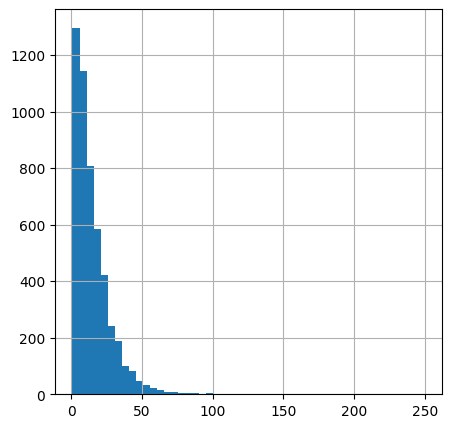

In [ ]:
seq_len = [len(i) for i in train_sequencesT3]

pd.Series(seq_len).hist(bins=50,figsize=(5,5))

### Batch learning

##### LSTM

In [ ]:
def create_model_lstm(vocabulary_size):
  model_lstm = Sequential()
  model_lstm.add(Embedding(vocabulary_size, input_length=vector_size,trainable=True,output_dim=256))
  model_lstm.add(LSTM(32, return_sequences=True))
  model_lstm.add(Flatten())
  model_lstm.add(Dense(4, activation='sigmoid'))#num_class
  return model_lstm

###### T1

In [ ]:
#Training
##Create LSTM sequence model for every training
model_lstm = create_model_lstm(vocabulary_sizeT1)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_lstm.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_lstm.predict(test_dataT1)
accr = model_lstm.evaluate(test_dataT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

Epoch 1/50
3/3 [==============================] - 20s 6s/step - loss: 1.2974 - accuracy: 0.3734 - val_loss: 1.2278 - val_accuracy: 0.4109
Epoch 2/50
3/3 [==============================] - 18s 5s/step - loss: 1.1539 - accuracy: 0.4718 - val_loss: 1.1388 - val_accuracy: 0.4703
Epoch 3/50
3/3 [==============================] - 19s 6s/step - loss: 1.1125 - accuracy: 0.5271 - val_loss: 1.1100 - val_accuracy: 0.5008
Epoch 4/50
3/3 [==============================] - 18s 6s/step - loss: 1.0669 - accuracy: 0.5511 - val_loss: 1.0936 - val_accuracy: 0.5382
Epoch 5/50
3/3 [==============================] - 22s 6s/step - loss: 1.0202 - accuracy: 0.5864 - val_loss: 1.0048 - val_accuracy: 0.5840
Epoch 6/50
3/3 [==============================] - 18s 6s/step - loss: 0.9202 - accuracy: 0.6465 - val_loss: 0.8787 - val_accuracy: 0.6367
Epoch 7/50
3/3 [==============================] - 18s 6s/step - loss: 0.7534 - accuracy: 0.7005 - val_loss: 0.8158 - val_accuracy: 0.6757
Epoch 8/50
3/3 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### T2

In [ ]:
#Training
model_lstm = create_model_lstm(vocabulary_sizeT2)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]

history = model_lstm.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_lstm.predict(test_dataT2)
accr = model_lstm.evaluate(test_dataT2, tf.keras.utils.to_categorical(y_testT2, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT2=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT2.append(i)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

Epoch 1/50
3/3 [==============================] - 18s 5s/step - loss: 1.3081 - accuracy: 0.3992 - val_loss: 1.2350 - val_accuracy: 0.4855
Epoch 2/50
3/3 [==============================] - 15s 4s/step - loss: 1.1630 - accuracy: 0.4797 - val_loss: 1.1518 - val_accuracy: 0.5280
Epoch 3/50
3/3 [==============================] - 15s 4s/step - loss: 1.1297 - accuracy: 0.5483 - val_loss: 1.1150 - val_accuracy: 0.5126
Epoch 4/50
3/3 [==============================] - 17s 5s/step - loss: 1.0928 - accuracy: 0.5201 - val_loss: 1.1014 - val_accuracy: 0.5319
Epoch 5/50
3/3 [==============================] - 16s 5s/step - loss: 1.0490 - accuracy: 0.5737 - val_loss: 1.0417 - val_accuracy: 0.5977
Epoch 6/50
3/3 [==============================] - 15s 5s/step - loss: 0.9852 - accuracy: 0.6467 - val_loss: 0.9561 - val_accuracy: 0.6364
Epoch 7/50
3/3 [==============================] - 15s 5s/step - loss: 0.8609 - accuracy: 0.6744 - val_loss: 0.8494 - val_accuracy: 0.6615
Epoch 8/50
3/3 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### T3

In [ ]:
#Training
model_lstm = create_model_lstm(vocabulary_sizeT3)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]

history = model_lstm.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_lstm.predict(test_dataT3)
accr = model_lstm.evaluate(test_dataT3, tf.keras.utils.to_categorical(y_testT3, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT3=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT3.append(i)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

Epoch 1/50
3/3 [==============================] - 18s 5s/step - loss: 1.3108 - accuracy: 0.4205 - val_loss: 1.2454 - val_accuracy: 0.4692
Epoch 2/50
3/3 [==============================] - 17s 5s/step - loss: 1.1896 - accuracy: 0.4856 - val_loss: 1.1706 - val_accuracy: 0.4433
Epoch 3/50
3/3 [==============================] - 15s 5s/step - loss: 1.1530 - accuracy: 0.4774 - val_loss: 1.1300 - val_accuracy: 0.4732
Epoch 4/50
3/3 [==============================] - 15s 5s/step - loss: 1.1036 - accuracy: 0.5133 - val_loss: 1.1264 - val_accuracy: 0.5149
Epoch 5/50
3/3 [==============================] - 15s 4s/step - loss: 1.0795 - accuracy: 0.6027 - val_loss: 1.0614 - val_accuracy: 0.5825
Epoch 6/50
3/3 [==============================] - 15s 4s/step - loss: 0.9987 - accuracy: 0.6596 - val_loss: 0.9755 - val_accuracy: 0.6183
Epoch 7/50
3/3 [==============================] - 16s 4s/step - loss: 0.8696 - accuracy: 0.6784 - val_loss: 0.8515 - val_accuracy: 0.6362
Epoch 8/50
3/3 [==================

##### CNN

In [ ]:
def create_model_cnn(vocabulary_size):
  model_cnn = Sequential()
  model_cnn.add(Embedding(vocabulary_size, input_length=vector_size,trainable=True,output_dim=256))
  #model_glove.add(Embedding(vocabulary_size, input_length=200,trainable=False,output_dim=200,weights=[embedding_matrix])) #glove
  model_cnn.add(Conv1D(filters=256, kernel_size=8, padding='same', activation='relu'))
  model_cnn.add(Flatten())
  model_cnn.add(Dense(4, activation='sigmoid'))#num_class
  return model_cnn

###### T1

In [ ]:
#Training
##Create sequence model for every training
#Training
model_cnn = create_model_cnn(vocabulary_sizeT1)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_cnn.predict(test_dataT1)
accr = model_cnn.evaluate(test_dataT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

Epoch 1/50
3/3 [==============================] - 20s 6s/step - loss: 1.2717 - accuracy: 0.3269 - val_loss: 1.2623 - val_accuracy: 0.4109
Epoch 2/50
3/3 [==============================] - 20s 6s/step - loss: 1.1441 - accuracy: 0.4576 - val_loss: 1.1473 - val_accuracy: 0.4822
Epoch 3/50
3/3 [==============================] - 18s 6s/step - loss: 1.1073 - accuracy: 0.5008 - val_loss: 1.1153 - val_accuracy: 0.5059
Epoch 4/50
3/3 [==============================] - 18s 5s/step - loss: 1.0460 - accuracy: 0.5585 - val_loss: 1.0837 - val_accuracy: 0.5297
Epoch 5/50
3/3 [==============================] - 19s 6s/step - loss: 0.9887 - accuracy: 0.5977 - val_loss: 1.0266 - val_accuracy: 0.5840
Epoch 6/50
3/3 [==============================] - 18s 6s/step - loss: 0.9070 - accuracy: 0.6436 - val_loss: 0.9338 - val_accuracy: 0.6299
Epoch 7/50
3/3 [==============================] - 19s 6s/step - loss: 0.8080 - accuracy: 0.6920 - val_loss: 0.8531 - val_accuracy: 0.6418
Epoch 8/50
3/3 [==================

###### T2

In [ ]:
#Training
model_cnn = create_model_cnn(vocabulary_sizeT2)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_cnn.predict(test_dataT2)
accr = model_cnn.evaluate(test_dataT2, tf.keras.utils.to_categorical(y_testT2, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT2=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT2.append(i)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

Epoch 1/50
3/3 [==============================] - 17s 4s/step - loss: 1.2947 - accuracy: 0.2961 - val_loss: 1.2362 - val_accuracy: 0.4855
Epoch 2/50
3/3 [==============================] - 17s 5s/step - loss: 1.1555 - accuracy: 0.4838 - val_loss: 1.1548 - val_accuracy: 0.4836
Epoch 3/50
3/3 [==============================] - 16s 5s/step - loss: 1.1186 - accuracy: 0.5522 - val_loss: 1.1087 - val_accuracy: 0.4874
Epoch 4/50
3/3 [==============================] - 16s 5s/step - loss: 1.0707 - accuracy: 0.5277 - val_loss: 1.1078 - val_accuracy: 0.5590
Epoch 5/50
3/3 [==============================] - 18s 5s/step - loss: 1.0324 - accuracy: 0.6253 - val_loss: 1.0614 - val_accuracy: 0.5899
Epoch 6/50
3/3 [==============================] - 18s 5s/step - loss: 0.9651 - accuracy: 0.6449 - val_loss: 0.9788 - val_accuracy: 0.5996
Epoch 7/50
3/3 [==============================] - 16s 5s/step - loss: 0.8792 - accuracy: 0.6609 - val_loss: 0.9110 - val_accuracy: 0.6228
Epoch 8/50
3/3 [==================

###### T3

In [ ]:
#Training
model_cnn = create_model_cnn(vocabulary_sizeT3)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_cnn.predict(test_dataT3)
accr = model_cnn.evaluate(test_dataT3, tf.keras.utils.to_categorical(y_testT3, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT3=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT3.append(i)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

Epoch 1/50
3/3 [==============================] - 19s 5s/step - loss: 1.2893 - accuracy: 0.4024 - val_loss: 1.2197 - val_accuracy: 0.4394
Epoch 2/50
3/3 [==============================] - 17s 5s/step - loss: 1.1669 - accuracy: 0.4566 - val_loss: 1.1586 - val_accuracy: 0.4871
Epoch 3/50
3/3 [==============================] - 17s 5s/step - loss: 1.1268 - accuracy: 0.6058 - val_loss: 1.1221 - val_accuracy: 0.4930
Epoch 4/50
3/3 [==============================] - 19s 5s/step - loss: 1.0676 - accuracy: 0.5923 - val_loss: 1.0996 - val_accuracy: 0.5487
Epoch 5/50
3/3 [==============================] - 17s 4s/step - loss: 1.0205 - accuracy: 0.6549 - val_loss: 1.0427 - val_accuracy: 0.5825
Epoch 6/50
3/3 [==============================] - 20s 5s/step - loss: 0.9278 - accuracy: 0.6718 - val_loss: 0.9548 - val_accuracy: 0.6282
Epoch 7/50
3/3 [==============================] - 16s 5s/step - loss: 0.8034 - accuracy: 0.7107 - val_loss: 0.8549 - val_accuracy: 0.6640
Epoch 8/50
3/3 [==================

##### Pyramid NN

In [ ]:
def create_model_pnn(vocabulary_size):
  model_pnn = Sequential()
  model_pnn.add(Embedding(vocabulary_size, input_length=vector_size,trainable=True,output_dim=256))
  model_pnn.add(Flatten())
  model_pnn.add(Dense(512, activation='sigmoid'))
  model_pnn.add(Dense(256, activation='sigmoid'))
  model_pnn.add(Dense(128, activation='sigmoid'))
  model_pnn.add(Dense(64, activation='sigmoid'))
  model_pnn.add(Dense(32, activation='sigmoid'))
  model_pnn.add(Dense(16, activation='sigmoid'))
  model_pnn.add(Dense(8, activation='sigmoid'))
  model_pnn.add(Dense(4, activation='sigmoid'))#num_class
  return model_pnn

###### T1

In [ ]:
#Training
##Create LSTM sequence model for every training
model_pnn = create_model_pnn(vocabulary_sizeT1)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_pnn.predict(test_dataT1)
accr = model_pnn.evaluate(test_dataT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

Epoch 1/50
3/3 [==============================] - 11s 2s/step - loss: 1.6180 - accuracy: 0.1634 - val_loss: 1.5540 - val_accuracy: 0.2003
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 1.5801 - accuracy: 0.1634 - val_loss: 1.5226 - val_accuracy: 0.2003
Epoch 3/50
3/3 [==============================] - 5s 1s/step - loss: 1.5462 - accuracy: 0.1634 - val_loss: 1.4949 - val_accuracy: 0.2003
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.5161 - accuracy: 0.1634 - val_loss: 1.4701 - val_accuracy: 0.2003
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 1.4888 - accuracy: 0.1634 - val_loss: 1.4478 - val_accuracy: 0.2003
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 1.4642 - accuracy: 0.1634 - val_loss: 1.4274 - val_accuracy: 0.2003
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.4415 - accuracy: 0.1634 - val_loss: 1.4089 - val_accuracy: 0.2003
Epoch 8/50
3/3 [========================

###### T2

In [ ]:
#Training
model_pnn = create_model_pnn(vocabulary_sizeT2)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_pnn.predict(test_dataT2)
accr = model_pnn.evaluate(test_dataT2, tf.keras.utils.to_categorical(y_testT2, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT2=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT2.append(i)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

Epoch 1/50
3/3 [==============================] - 7s 1s/step - loss: 1.3146 - accuracy: 0.1743 - val_loss: 1.2491 - val_accuracy: 0.2244
Epoch 2/50
3/3 [==============================] - 3s 965ms/step - loss: 1.2971 - accuracy: 0.3426 - val_loss: 1.2359 - val_accuracy: 0.4855
Epoch 3/50
3/3 [==============================] - 3s 959ms/step - loss: 1.2811 - accuracy: 0.4777 - val_loss: 1.2243 - val_accuracy: 0.4855
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 1.2665 - accuracy: 0.4777 - val_loss: 1.2141 - val_accuracy: 0.4855
Epoch 5/50
3/3 [==============================] - 3s 983ms/step - loss: 1.2535 - accuracy: 0.4777 - val_loss: 1.2052 - val_accuracy: 0.4855
Epoch 6/50
3/3 [==============================] - 3s 955ms/step - loss: 1.2416 - accuracy: 0.4777 - val_loss: 1.1975 - val_accuracy: 0.4855
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.2310 - accuracy: 0.4777 - val_loss: 1.1908 - val_accuracy: 0.4855
Epoch 8/50
3/3 [=============

###### T3

In [ ]:
#Training
model_pnn = create_model_pnn(vocabulary_sizeT3)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_pnn.predict(test_dataT3)
accr = model_pnn.evaluate(test_dataT3, tf.keras.utils.to_categorical(y_testT3, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT3=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT3.append(i)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 1.3514 - accuracy: 0.4464 - val_loss: 1.3365 - val_accuracy: 0.4394
Epoch 2/50
3/3 [==============================] - 3s 954ms/step - loss: 1.3301 - accuracy: 0.4464 - val_loss: 1.3184 - val_accuracy: 0.4394
Epoch 3/50
3/3 [==============================] - 3s 966ms/step - loss: 1.3120 - accuracy: 0.4464 - val_loss: 1.3032 - val_accuracy: 0.4394
Epoch 4/50
3/3 [==============================] - 5s 1s/step - loss: 1.2967 - accuracy: 0.4464 - val_loss: 1.2902 - val_accuracy: 0.4394
Epoch 5/50
3/3 [==============================] - 3s 965ms/step - loss: 1.2834 - accuracy: 0.4464 - val_loss: 1.2790 - val_accuracy: 0.4394
Epoch 6/50
3/3 [==============================] - 3s 935ms/step - loss: 1.2721 - accuracy: 0.4464 - val_loss: 1.2693 - val_accuracy: 0.4394
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.2622 - accuracy: 0.4464 - val_loss: 1.2607 - val_accuracy: 0.4394
Epoch 8/50
3/3 [=============

#### Fine-tune Ro-BERT

In [ ]:
!pip install tensorflow_hub tensorflow_text

In [ ]:
#Restart the runtime before importing
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
encoder_inputs = preprocessor(text_input)

encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1", trainable=False) #True needs time and resources
encoder_outputs = encoder(encoder_inputs)
pooled_output = encoder_outputs["pooled_output"]

In [ ]:
embedding_model = tf.keras.Model(text_input, pooled_output)

In [ ]:
# Define the model architecture
def create_bert_model():
  model_bert = Sequential()
  model_bert.add(embedding_model)
  model_bert.add(tf.keras.layers.Reshape((768, 1)))
  #model.add(tf.keras.layers.LSTM(32))
  model_bert.add(Flatten())
  model_bert.add(Dense(units=8))
  model_bert.add(Dense(units=4, activation='softmax'))
  return model_bert


###### T1

In [ ]:
#Training
model_bert = create_bert_model()
# Compile the model
model_bert.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_bert.fit(X_trainT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_bert.predict(X_testT1)
accr = model_bert.evaluate(X_testT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

Epoch 1/50
3/3 [==============================] - 67s 18s/step - loss: 1.3311 - accuracy: 0.2871 - val_loss: 1.2008 - val_accuracy: 0.4109
Epoch 2/50
3/3 [==============================] - 59s 21s/step - loss: 1.1556 - accuracy: 0.4340 - val_loss: 1.1864 - val_accuracy: 0.4109
Epoch 3/50
3/3 [==============================] - 54s 18s/step - loss: 1.1312 - accuracy: 0.4340 - val_loss: 1.1737 - val_accuracy: 0.4143
Epoch 4/50
3/3 [==============================] - 53s 17s/step - loss: 1.1384 - accuracy: 0.3966 - val_loss: 1.1863 - val_accuracy: 0.3582
Epoch 5/50
3/3 [==============================] - 53s 17s/step - loss: 1.1378 - accuracy: 0.3868 - val_loss: 1.2030 - val_accuracy: 0.4109
Epoch 6/50
3/3 [==============================] - 53s 17s/step - loss: 1.1428 - accuracy: 0.4340 - val_loss: 1.2087 - val_accuracy: 0.4109
Epoch 7/50
3/3 [==============================] - 53s 17s/step - loss: 1.1406 - accuracy: 0.4340 - val_loss: 1.1914 - val_accuracy: 0.4261
Epoch 8/50
3/3 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### T2

In [ ]:
#Training
model_bert = create_bert_model()
# Compile the model
model_bert.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_bert.fit(X_trainT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=1024)
#Evaluation
predict = model_bert.predict(X_testT2)
accr = model_bert.evaluate(X_testT2, tf.keras.utils.to_categorical(y_testT2, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT2=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT2.append(i)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

Epoch 1/50
5/5 [==============================] - 58s 9s/step - loss: 1.3470 - accuracy: 0.3516 - val_loss: 1.3179 - val_accuracy: 0.4855
Epoch 2/50
5/5 [==============================] - 41s 8s/step - loss: 1.2232 - accuracy: 0.4708 - val_loss: 1.2675 - val_accuracy: 0.2534
Epoch 3/50
5/5 [==============================] - 42s 8s/step - loss: 1.1599 - accuracy: 0.3854 - val_loss: 1.1432 - val_accuracy: 0.4855
Epoch 4/50
5/5 [==============================] - 41s 8s/step - loss: 1.1560 - accuracy: 0.4777 - val_loss: 1.1416 - val_accuracy: 0.4855
Epoch 5/50
5/5 [==============================] - 40s 8s/step - loss: 1.1335 - accuracy: 0.4777 - val_loss: 1.1919 - val_accuracy: 0.4855
Epoch 6/50
5/5 [==============================] - 42s 8s/step - loss: 1.1348 - accuracy: 0.4777 - val_loss: 1.1560 - val_accuracy: 0.4855
Epoch 7/50
5/5 [==============================] - 43s 9s/step - loss: 1.1287 - accuracy: 0.4777 - val_loss: 1.1394 - val_accuracy: 0.4855
Epoch 8/50
5/5 [==================

###### T3

In [ ]:
#Training
model_bert = create_bert_model()
# Compile the model
model_bert.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_bert.fit(X_testT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=1024)
#Evaluation
predict = model_bert.predict(X_testT3)
accr = model_bert.evaluate(X_testT3, tf.keras.utils.to_categorical(y_testT3, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT3=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT3.append(i)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

Epoch 1/50
2/2 [==============================] - 22s 8s/step - loss: 1.2048 - accuracy: 0.4354 - val_loss: 1.1754 - val_accuracy: 0.4444
Epoch 2/50
2/2 [==============================] - 12s 4s/step - loss: 1.1543 - accuracy: 0.4398 - val_loss: 1.1716 - val_accuracy: 0.4444
Epoch 3/50
2/2 [==============================] - 10s 2s/step - loss: 1.1446 - accuracy: 0.4398 - val_loss: 1.1810 - val_accuracy: 0.4444
Epoch 4/50
2/2 [==============================] - 10s 2s/step - loss: 1.1444 - accuracy: 0.4398 - val_loss: 1.1949 - val_accuracy: 0.4444
Epoch 5/50
2/2 [==============================] - 10s 2s/step - loss: 1.1423 - accuracy: 0.4398 - val_loss: 1.2147 - val_accuracy: 0.3016
Epoch 6/50
2/2 [==============================] - 10s 2s/step - loss: 1.1511 - accuracy: 0.3681 - val_loss: 1.2094 - val_accuracy: 0.4206
Epoch 7/50
2/2 [==============================] - 10s 2s/step - loss: 1.1475 - accuracy: 0.4168 - val_loss: 1.1896 - val_accuracy: 0.4444
Epoch 8/50
2/2 [==================

### Batch Learning with pre-trained Embedding

I am using Glove 200-D pre-trained embedding in this work. In this section I have only presented with T1. Same can be replicated for others. Kindly download the pre-trained embeddings from https://nlp.stanford.edu/data/glove.twitter.27B.zip

In [ ]:
embeddings_index = dict()
f = open('glove.twitter.27B.200d.txt','rb')
header = f.readline()

In [ ]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()

In [ ]:
oov_words=[]
embedding_dim=vector_size
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

for word, index in tokenizer.word_index.items():
  if index > vocabulary_size - 1:
      break
  else:
      embedding_vector = embeddings_index.get(bytes(word,'utf-8'))

      #print(embedding_vector)
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector
      else:
        oov_words.append(word)

In [ ]:
# Converting text to arrays for T1
tokenizer_w = WhitespaceTokenizer()
tokenizerT1 = Tokenizer(oov_token='oov')

tokenizerT1.fit_on_texts(T1['text'])

word_indexT1 = tokenizerT1.word_index
vocabulary_sizeT1 =len(word_indexT1)+1

train_sequencesT1 = tokenizerT1.texts_to_sequences(X_trainT1)
test_sequencesT1 = tokenizerT1.texts_to_sequences(X_testT1)
vector_size=200 # for embedding
train_dataT1 = pad_sequences(train_sequencesT1, maxlen=vector_size, padding='post',truncating='pre')
test_dataT1 = pad_sequences(test_sequencesT1, maxlen=vector_size, padding='post')

#### T1

In [ ]:
def create_model_lstm(vocabulary_size):
  model_lstm = Sequential()
  model.add(Embedding(vocabulary_size, input_length=200,trainable=False,output_dim=200,weights=[embedding_matrix])) #glove
  model_lstm.add(LSTM(32, return_sequences=True))
  model_lstm.add(Flatten())
  model_lstm.add(Dense(4, activation='sigmoid'))#num_class
  return model_lstm

In [ ]:
#Training
##Create LSTM sequence model for every training
model_lstm = create_model_lstm(vocabulary_sizeT1)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_lstm.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict = model_lstm.predict(test_dataT1)
accr = model_lstm.evaluate(test_dataT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

### ML Based methods

#### One-vs-one classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

#####T1

######KNN

In [ ]:
#KNN
ovo = OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=4))
ovo.fit(train_dataT1, y_trainT1)
predict = ovo.predict(test_dataT1)

#printing the results
print(classification_report(y_testT1, predict, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, predict))

######BNB

In [ ]:
#BNB
ovo = OneVsOneClassifier(estimator=BernoulliNB())
ovo.fit(train_dataT1, y_trainT1)
predict = ovo.predict(test_dataT1)

#printing the results
print(classification_report(y_testT1, predict, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, predict))

######LR

In [ ]:
#LR
ovo = OneVsOneClassifier(estimator=LogisticRegression())
ovo.fit(train_dataT1, y_trainT1)
predict = ovo.predict(test_dataT1)

#printing the results
print(classification_report(y_testT1, predict, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, predict))

#####T2

######KNN

In [ ]:
ovo = OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=4))
ovo.fit(train_dataT2, y_trainT2)
y_predT2 = ovo.predict(test_dataT2)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

              precision    recall  f1-score   support

   treatment       0.38      0.50      0.43       424
     chronic       0.54      0.58      0.56       602
      cancer       0.27      0.07      0.12       229
     allergy       0.00      0.00      0.00        36

    accuracy                           0.45      1291
   macro avg       0.30      0.29      0.28      1291
weighted avg       0.42      0.45      0.42      1291

Matthews Corelation Score (MCC) :  0.10272936730111448


###### BNB

In [ ]:
ovo = OneVsOneClassifier(estimator=BernoulliNB())
ovo.fit(train_dataT2, y_trainT2)
y_predT2 = ovo.predict(test_dataT2)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

######LR

In [ ]:
ovo = OneVsOneClassifier(estimator=LogisticRegression())
ovo.fit(train_dataT2, y_trainT2)
y_predT2 = ovo.predict(test_dataT2)

#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

#####T3

######KNN

In [ ]:
ovo = OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=4))
ovo.fit(train_dataT3, y_trainT3)
y_predT3 = ovo.predict(test_dataT3)


#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

              precision    recall  f1-score   support

   treatment       0.41      0.63      0.50       439
     chronic       0.55      0.49      0.52       576
      cancer       0.31      0.10      0.15       199
     allergy       0.67      0.05      0.09        42

    accuracy                           0.46      1256
   macro avg       0.48      0.32      0.31      1256
weighted avg       0.47      0.46      0.44      1256

Matthews Corelation Score (MCC) :  0.13427118802028298


###### BNB

In [ ]:
ovo = OneVsOneClassifier(estimator=BernoulliNB())
ovo.fit(train_dataT3, y_trainT3)
y_predT3 = ovo.predict(test_dataT3)


#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

######LR

In [ ]:
ovo = OneVsOneClassifier(estimator=LogisticRegression())
ovo.fit(train_dataT3, y_trainT3)
y_predT3 = ovo.predict(test_dataT3)


#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

#### One-vs-rest classifiers

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.multiclass import OneVsRestClassifier

#####T1

######GB

In [ ]:
ovr = OneVsRestClassifier(estimator=GradientBoostingClassifier())
ovr.fit(train_dataT1, y_trainT1)
y_predT1 = ovr.predict(test_dataT1)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

              precision    recall  f1-score   support

   treatment       0.58      0.69      0.63       538
     chronic       0.60      0.76      0.67       640
      cancer       0.52      0.04      0.08       256
     allergy       0.83      0.26      0.40        38

    accuracy                           0.60      1472
   macro avg       0.64      0.44      0.45      1472
weighted avg       0.59      0.60      0.55      1472

Matthews Corelation Score (MCC) :  0.34406112976822995


######SGDC

In [ ]:
ovr = OneVsRestClassifier(estimator=SGDClassifier())
ovr.fit(train_dataT1, y_trainT1)
y_predT1 = ovr.predict(test_dataT1)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

#####T2

######GB

In [ ]:
ovr = OneVsRestClassifier(estimator=GradientBoostingClassifier())
ovr.fit(train_dataT2, y_trainT2)
y_predT2 = ovo.predict(test_dataT2)


#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

######SDGC

In [ ]:
ovr = OneVsRestClassifier(estimator=SGDClassifier())
ovr.fit(train_dataT2, y_trainT2)
y_predT2 = ovo.predict(test_dataT2)


#printing the results
print(classification_report(y_testT2, y_predT2, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, y_predT2))

#####T3

######GB

In [ ]:
ovr = OneVsRestClassifier(estimator=GradientBoostingClassifier())
ovr.fit(train_dataT3, y_trainT3)
y_predT3 = ovr.predict(test_dataT3)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

              precision    recall  f1-score   support

   treatment       0.63      0.65      0.64       439
     chronic       0.63      0.81      0.71       576
      cancer       0.60      0.14      0.23       199
     allergy       0.95      0.45      0.61        42

    accuracy                           0.63      1256
   macro avg       0.70      0.51      0.55      1256
weighted avg       0.63      0.63      0.60      1256

Matthews Corelation Score (MCC) :  0.40075481038491506


######SDGC

In [ ]:
ovr = OneVsRestClassifier(estimator=SGDClassifier())
ovr.fit(train_dataT3, y_trainT3)
y_predT3 = ovr.predict(test_dataT3)

#printing the results
print(classification_report(y_testT3, y_predT3, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, y_predT3))

### Ensemble learning

#####T1

In [ ]:
##Model 1
model_lstm = create_model_lstm(vocabulary_sizeT1)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_lstm.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_a = model_lstm.predict(test_dataT1)

##Model 2
model_cnn = create_model_cnn(vocabulary_sizeT1)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_b = model_cnn.predict(test_dataT1)

##Model 3
model_pnn = create_model_pnn(vocabulary_sizeT1)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_c = model_pnn.predict(test_dataT1)


Epoch 1/50
3/3 [==============================] - 8s 356ms/step - loss: 1.3681 - accuracy: 0.3318 - val_loss: 1.2953 - val_accuracy: 0.5348
Epoch 2/50
3/3 [==============================] - 0s 129ms/step - loss: 1.2446 - accuracy: 0.6013 - val_loss: 1.1852 - val_accuracy: 0.5314
Epoch 3/50
3/3 [==============================] - 0s 127ms/step - loss: 1.1329 - accuracy: 0.5830 - val_loss: 1.1780 - val_accuracy: 0.4907
Epoch 4/50
3/3 [==============================] - 0s 125ms/step - loss: 1.1072 - accuracy: 0.5722 - val_loss: 1.1128 - val_accuracy: 0.5722
Epoch 5/50
3/3 [==============================] - 0s 132ms/step - loss: 1.0379 - accuracy: 0.6213 - val_loss: 1.0415 - val_accuracy: 0.5891
Epoch 6/50
3/3 [==============================] - 0s 126ms/step - loss: 0.9836 - accuracy: 0.6395 - val_loss: 0.9908 - val_accuracy: 0.6044
Epoch 7/50
3/3 [==============================] - 0s 86ms/step - loss: 0.9209 - accuracy: 0.6538 - val_loss: 0.9177 - val_accuracy: 0.6265
Epoch 8/50
3/3 [=====

In [ ]:
# iterate through rows
for i in range(0,len(predict_a)):
# iterate through columns
    for j in range(0,len(predict_a[0])):
        predict_a[i][j] = predict_a[i][j] + predict_b[i][j] + predict_c[i][j]

In [ ]:
ensemble_prd=[]
for j in range(0,len(predict_a)):
  for i in range(0,len(predict_a[j])):
    if predict_a[j][i] == max(predict_a[j]):
      ensemble_prd.append(i)

#printing the results
print(classification_report(y_testT1, ensemble_prd, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, ensemble_prd))

              precision    recall  f1-score   support

   treatment       0.80      0.90      0.85       538
     chronic       0.88      0.91      0.89       640
      cancer       0.85      0.69      0.76       256
     allergy       0.00      0.00      0.00        38

    accuracy                           0.84      1472
   macro avg       0.63      0.62      0.63      1472
weighted avg       0.82      0.84      0.83      1472

Matthews Corelation Score (MCC) :  0.7547753960045053


#####T2

In [ ]:
##Model 1
model_lstm = create_model_lstm(vocabulary_sizeT2)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_lstm.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_a = model_lstm.predict(test_dataT2)

##Model 2
model_cnn = create_model_cnn(vocabulary_sizeT2)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_b = model_cnn.predict(test_dataT2)

##Model 3
model_pnn = create_model_pnn(vocabulary_sizeT2)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_c = model_pnn.predict(test_dataT2)


Epoch 1/50
3/3 [==============================] - 4s 387ms/step - loss: 1.3584 - accuracy: 0.3602 - val_loss: 1.2889 - val_accuracy: 0.5068
Epoch 2/50
3/3 [==============================] - 1s 216ms/step - loss: 1.2484 - accuracy: 0.5102 - val_loss: 1.1956 - val_accuracy: 0.5106
Epoch 3/50
3/3 [==============================] - 1s 211ms/step - loss: 1.1475 - accuracy: 0.5195 - val_loss: 1.1798 - val_accuracy: 0.5106
Epoch 4/50
3/3 [==============================] - 1s 213ms/step - loss: 1.1261 - accuracy: 0.5180 - val_loss: 1.1302 - val_accuracy: 0.5377
Epoch 5/50
3/3 [==============================] - 1s 209ms/step - loss: 1.0692 - accuracy: 0.5700 - val_loss: 1.0815 - val_accuracy: 0.5687
Epoch 6/50
3/3 [==============================] - 1s 216ms/step - loss: 1.0346 - accuracy: 0.6152 - val_loss: 1.0481 - val_accuracy: 0.5977
Epoch 7/50
3/3 [==============================] - 1s 278ms/step - loss: 1.0018 - accuracy: 0.6368 - val_loss: 1.0004 - val_accuracy: 0.6209
Epoch 8/50
3/3 [====

In [ ]:
# iterate through rows
for i in range(0,len(predict_a)):
# iterate through columns
    for j in range(0,len(predict_a[0])):
        predict_a[i][j] = predict_a[i][j] + predict_b[i][j] + predict_c[i][j]

In [ ]:
ensemble_prd=[]
for j in range(0,len(predict_a)):
  for i in range(0,len(predict_a[j])):
    if predict_a[j][i] == max(predict_a[j]):
      ensemble_prd.append(i)

#printing the results
print(classification_report(y_testT2, ensemble_prd, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT2, ensemble_prd))

              precision    recall  f1-score   support

   treatment       0.82      0.86      0.84       424
     chronic       0.87      0.93      0.89       602
      cancer       0.82      0.73      0.77       229
     allergy       0.00      0.00      0.00        36

    accuracy                           0.84      1291
   macro avg       0.63      0.63      0.63      1291
weighted avg       0.82      0.84      0.83      1291

Matthews Corelation Score (MCC) :  0.7520397307247726


#####T3

In [ ]:
##Model 1
model_lstm = create_model_lstm(vocabulary_sizeT3)
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_lstm.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_a = model_lstm.predict(test_dataT3)

##Model 2
model_cnn = create_model_cnn(vocabulary_sizeT3)
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_cnn.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_b = model_cnn.predict(test_dataT3)

##Model 3
model_pnn = create_model_pnn(vocabulary_sizeT3)
model_pnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]
history = model_pnn.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)
#Evaluation
predict_c = model_pnn.predict(test_dataT3)


Epoch 1/50
3/3 [==============================] - 7s 1s/step - loss: 1.3481 - accuracy: 0.4427 - val_loss: 1.2570 - val_accuracy: 0.4453
Epoch 2/50
3/3 [==============================] - 1s 218ms/step - loss: 1.2236 - accuracy: 0.4630 - val_loss: 1.1774 - val_accuracy: 0.4414
Epoch 3/50
3/3 [==============================] - 1s 210ms/step - loss: 1.1582 - accuracy: 0.4555 - val_loss: 1.1679 - val_accuracy: 0.4414
Epoch 4/50
3/3 [==============================] - 0s 82ms/step - loss: 1.1296 - accuracy: 0.4610 - val_loss: 1.1219 - val_accuracy: 0.4632
Epoch 5/50
3/3 [==============================] - 0s 129ms/step - loss: 1.0863 - accuracy: 0.5376 - val_loss: 1.1086 - val_accuracy: 0.5109
Epoch 6/50
3/3 [==============================] - 0s 140ms/step - loss: 1.0690 - accuracy: 0.5989 - val_loss: 1.0822 - val_accuracy: 0.5646
Epoch 7/50
3/3 [==============================] - 0s 133ms/step - loss: 1.0254 - accuracy: 0.6377 - val_loss: 1.0366 - val_accuracy: 0.5845
Epoch 8/50
3/3 [========

In [ ]:
# iterate through rows
for i in range(0,len(predict_a)):
# iterate through columns
    for j in range(0,len(predict_a[0])):
        predict_a[i][j] = predict_a[i][j] + predict_b[i][j] + predict_c[i][j]

In [ ]:
ensemble_prd=[]
for j in range(0,len(predict_a)):
  for i in range(0,len(predict_a[j])):
    if predict_a[j][i] == max(predict_a[j]):
      ensemble_prd.append(i)

#printing the results
print(classification_report(y_testT3, ensemble_prd, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT3, ensemble_prd))

              precision    recall  f1-score   support

   treatment       0.76      0.87      0.81       439
     chronic       0.88      0.90      0.89       576
      cancer       0.85      0.70      0.77       199
     allergy       1.00      0.05      0.09        42

    accuracy                           0.83      1256
   macro avg       0.87      0.63      0.64      1256
weighted avg       0.84      0.83      0.81      1256

Matthews Corelation Score (MCC) :  0.7263883886372967


###Continual Learning

In [ ]:
def choose_data_model(data, model):
  tokenizer_w = WhitespaceTokenizer()
  tokenizerT1 = Tokenizer(oov_token='oov')

  if data=='T1':
    tokenizerT1.fit_on_texts(T1['text'])
  elif data=='T2':
    tokenizerT1.fit_on_texts(T2['text'])
  elif data=='T3':
    tokenizerT1.fit_on_texts(T3['text'])

  word_indexT1 = tokenizerT1.word_index
  vocabulary_sizeT1 =len(word_indexT1)+1

  if model=='LSTM':
    model_opted = create_model_lstm(vocabulary_sizeT1)
  elif model=='CNN':
    model_opted = create_model_cnn(vocabulary_sizeT1)
  elif model=='PNN':
    model_opted = create_model_pnn(vocabulary_sizeT1)

  return tokenizerT1, model_opted


In [ ]:
model='LSTM' #choose either CNN or PNN
data='T1' #choose either T2 or T3
tokenizerT1, model_lstm = choose_data_model(data, model)

In [ ]:
train_sequencesT1 = tokenizerT1.texts_to_sequences(X_trainT1)
test_sequencesT1 = tokenizerT1.texts_to_sequences(X_testT1)
vector_size=50
#vector_size=200 # for embedding
train_dataT1 = pad_sequences(train_sequencesT1, maxlen=vector_size, padding='post',truncating='pre')
test_dataT1 = pad_sequences(test_sequencesT1, maxlen=vector_size, padding='post')

#In continual learning, there will be only one tokenizer
train_sequencesT2 = tokenizerT1.texts_to_sequences(X_trainT2)
test_sequencesT2 = tokenizerT1.texts_to_sequences(X_testT2)
vector_size=50
#vector_size=200 # for embedding
train_dataT2 = pad_sequences(train_sequencesT2, maxlen=vector_size, padding='post',truncating='pre')
test_dataT2 = pad_sequences(test_sequencesT2, maxlen=vector_size, padding='post')

train_sequencesT3 = tokenizerT1.texts_to_sequences(X_trainT3)
test_sequencesT3 = tokenizerT1.texts_to_sequences(X_testT3)
vector_size=50
#vector_size=200 # for embedding
train_dataT3 = pad_sequences(train_sequencesT3, maxlen=vector_size, padding='post',truncating='pre')
test_dataT3 = pad_sequences(test_sequencesT3, maxlen=vector_size, padding='post')

#### Training

We can have different training and testing sets based on our requirements.

In [ ]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, restore_best_weights=True)
callbacks_list = [early_stopping]

#Select desired training sequence
model_lstm.fit(train_dataT1, tf.keras.utils.to_categorical(y_trainT1, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)

#Further train the same model on G2
model_lstm.fit(train_dataT2, tf.keras.utils.to_categorical(y_trainT2, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)

##Further train the same model on G3
model_lstm.fit(train_dataT3, tf.keras.utils.to_categorical(y_trainT3, num_classes=4, dtype='float32'), validation_split=0.1, epochs = 50, callbacks=callbacks_list, batch_size=2048)

Epoch 1/50
3/3 [==============================] - 5s 507ms/step - loss: 1.3507 - accuracy: 0.3163 - val_loss: 1.2788 - val_accuracy: 0.3837
Epoch 2/50
3/3 [==============================] - 1s 209ms/step - loss: 1.2312 - accuracy: 0.4094 - val_loss: 1.1849 - val_accuracy: 0.5331
Epoch 3/50
3/3 [==============================] - 1s 190ms/step - loss: 1.1351 - accuracy: 0.5777 - val_loss: 1.1765 - val_accuracy: 0.4448
Epoch 4/50
3/3 [==============================] - 1s 200ms/step - loss: 1.1147 - accuracy: 0.4854 - val_loss: 1.1335 - val_accuracy: 0.4788
Epoch 5/50
3/3 [==============================] - 1s 202ms/step - loss: 1.0639 - accuracy: 0.5734 - val_loss: 1.0778 - val_accuracy: 0.5739
Epoch 6/50
3/3 [==============================] - 0s 204ms/step - loss: 1.0245 - accuracy: 0.6240 - val_loss: 1.0453 - val_accuracy: 0.5925
Epoch 7/50
3/3 [==============================] - 0s 92ms/step - loss: 0.9840 - accuracy: 0.6395 - val_loss: 0.9919 - val_accuracy: 0.6027
Epoch 8/50
3/3 [=====

In [ ]:
#Performance on T1
#Evaluation
predict = model_lstm.predict(test_dataT1)
accr = model_lstm.evaluate(test_dataT1, tf.keras.utils.to_categorical(y_testT1, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_testT1, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_testT1, y_predT1))

46/46 [==============================] - 0s 5ms/step - loss: 0.3353 - accuracy: 0.8940
Test set
  Loss: 0.335
  Accuracy: 0.894
              precision    recall  f1-score   support

   treatment       0.89      0.88      0.88       538
     chronic       0.90      0.93      0.91       640
      cancer       0.92      0.86      0.89       256
     allergy       0.76      0.74      0.75        38

    accuracy                           0.89      1472
   macro avg       0.87      0.85      0.86      1472
weighted avg       0.89      0.89      0.89      1472

Matthews Corelation Score (MCC) :  0.8354096847090734


In [ ]:
#Performance on T1,T2
test_data = np.concatenate((test_dataT1, test_dataT2),axis=0)
y_test = np.concatenate((y_testT1, y_testT2),axis=0)
predict = model_lstm.predict(test_data)
accr = model_lstm.evaluate(test_data, tf.keras.utils.to_categorical(y_test, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_test, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_test, y_predT1))

87/87 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8914
Test set
  Loss: 0.332
  Accuracy: 0.891
              precision    recall  f1-score   support

   treatment       0.87      0.89      0.88       962
     chronic       0.90      0.92      0.91      1242
      cancer       0.91      0.84      0.88       485
     allergy       0.81      0.84      0.82        74

    accuracy                           0.89      2763
   macro avg       0.87      0.87      0.87      2763
weighted avg       0.89      0.89      0.89      2763

Matthews Corelation Score (MCC) :  0.8311719276630006


In [ ]:
#Performance on T1+T2+T3
test_data = np.concatenate((test_dataT1, test_dataT2, test_dataT3),axis=0)
y_test = np.concatenate((y_testT1, y_testT2,y_testT3),axis=0)
predict = model_lstm.predict(test_data)
accr = model_lstm.evaluate(test_data, tf.keras.utils.to_categorical(y_test, num_classes=4, dtype='float32'))
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

y_predT1=[]
for j in range(0,len(predict)):
  for i in range(0,len(predict[j])):
    if predict[j][i] == max(predict[j]):
      y_predT1.append(i)

#printing the results
print(classification_report(y_test, y_predT1, target_names=['treatment','chronic','cancer','allergy']))
print('Matthews Corelation Score (MCC) : ',matthews_corrcoef(y_test, y_predT1))

126/126 [==============================] - 1s 5ms/step - loss: 0.3254 - accuracy: 0.8913
Test set
  Loss: 0.325
  Accuracy: 0.891
              precision    recall  f1-score   support

   treatment       0.88      0.88      0.88      1401
     chronic       0.90      0.92      0.91      1818
      cancer       0.91      0.85      0.88       684
     allergy       0.85      0.84      0.84       116

    accuracy                           0.89      4019
   macro avg       0.88      0.87      0.88      4019
weighted avg       0.89      0.89      0.89      4019

Matthews Corelation Score (MCC) :  0.8304698585414735


## Extra

In [ ]:
!pip install keybert

In [ ]:
from keybert import KeyBERT

In [ ]:
file = open("sample.txt")
corpus = file.read()

In [ ]:
corpus

In [ ]:
kw_model = KeyBERT("all-MiniLM-L6-v2")
keys = kw_model.extract_keywords(corpus, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10, use_mmr=True)

In [ ]:
keys

[('diabetes distress', 0.6113),
 ('suggested consultations', 0.3965),
 ('care intervention', 0.3898),
 ('patients divided', 0.3277),
 ('complication t2dm', 0.2642),
 ('information sharing', 0.2151),
 ('biochemistry departments', 0.1961),
 ('gp unaware', 0.1775),
 ('shortcomings organizational', 0.1518),
 ('sdco requirements', 0.1167)]

In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [ ]:
summarizer(corpus, min_length=5, max_length=20)

[{'summary_text': 'diabetes distress is the most prevalent complication in T2DM patients, with 36% reporting'}]